<div class="alert alert-block alert-warning">
<h3>
    Final Project 
    <br>
    <br></h3>
<h1><center>Pengelompokan Startup berdasarkan faktor berapa kali didanai, besaran dana total, besaran dana rata-rata, kategori pendanaan, dan lokasi kantor</h1>
    <br></center>
    <h2>Muhamad Ariyanda Putra<br></h2>
    <h3>Purwadhika Data Science Bekasi</h3>

<div class="alert alert-block alert-success">
</div>

### Data : Startup Investments
### topics : Venture deals, organizations, people and exits
### by : Justinas Cirtautas

<div class="alert alert-block alert-success">
</div>

### Context
The startup world is flourishing. There are hundreds of new companies being founded each day and venture capital has become a substantial asset class with yearly investments exceeding $100B in the US alone. Crunchbase 2013 Snapshot © 2013 dataset provides a glimpse into this exciting world.
I hope you enjoy and learn while working with the data!

## Content
This diverse dataset contains information about the startup ecosystem: organizations, individuals, company news, funding rounds, acquisitions, and IPOs.

There are 11 tables that can be joined using unique IDs (schema to follow). More information about the individual data variables can be found on the Crunchabse Data website (under the API Entities Types section).

No extensive data quality check have been performed yet. The information is available up to December 2013.

While Kaggle contains other datasets focused on startup investments, to the best of my knowledge, this dataset has not yet been published on the platform and is unique.

### Acknowledgements
This Crunchbase 2013 Snapshot © 2013 dataset is fully attributed to Crunchbase.

## Inspiration
There are multiple avenues for exploration:

- EDA of the startup ecosystem.
- Tracking and analyzing investment trends over time
- Clustering VC funds based on their existing investments.
- Predicting which startup will proceed to raise further rounds / will get acquired / will file for an IPO.
- Mapping the network of individuals involved in the startup ecosystem.


<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-info">
    <h1> 1st Step: Data Preprocessing

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-warning">
    <H1> 1. Raw Data</H1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
CSV_LIST = ['acquisitions.csv',
           'degrees.csv',
           'funding_rounds.csv',
           'funds.csv',
           'investments.csv',
           'ipos.csv',
           'milestones.csv',
           'offices.csv',
           'people.csv',
           'relationships.csv']

In [4]:
df0 = pd.read_csv(CSV_LIST[0])
df1 = pd.read_csv(CSV_LIST[1])
df2 = pd.read_csv(CSV_LIST[2])
df3 = pd.read_csv(CSV_LIST[3])
df4 = pd.read_csv(CSV_LIST[4])
df5 = pd.read_csv(CSV_LIST[5])
df6 = pd.read_csv(CSV_LIST[6])
df7 = pd.read_csv(CSV_LIST[7])
df8 = pd.read_csv(CSV_LIST[8])
df9 = pd.read_csv(CSV_LIST[9])

In [6]:
DF_LIST = [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9]

In [7]:
CSV_DF = pd.DataFrame(index=np.arange(len(CSV_LIST)))
CSV_DF['NAME'] = CSV_LIST

In [8]:
ROWS_LIST = []
for i in range(len(CSV_LIST)):
    ROWS_LIST.append(DF_LIST[i].shape[0])

In [9]:
COL_LIST = []
for i in range(len(CSV_LIST)):
    COL_LIST.append(DF_LIST[i].shape[1])

In [10]:
COL_NAME_LIST = []
for i in range(len(CSV_LIST)):
    COL_NAME_LIST.append(list(DF_LIST[i].columns))

In [11]:
CSV_DF['ROWS'] = ROWS_LIST
CSV_DF['COLUMNS'] = COL_LIST
CSV_DF['COLUMNS_NAME'] = COL_NAME_LIST

In [12]:
CSV_DF

,NAME,ROWS,COLUMNS,COLUMNS_NAME
0,acquisitions.csv,9562,12,"[id, acquisition_id, acquiring_object_id, acqu..."
1,degrees.csv,109610,8,"[id, object_id, degree_type, subject, institut..."
2,funding_rounds.csv,52928,23,"[id, funding_round_id, object_id, funded_at, f..."
3,funds.csv,1564,11,"[id, fund_id, object_id, name, funded_at, rais..."
4,investments.csv,80902,6,"[id, funding_round_id, funded_object_id, inves..."
5,ipos.csv,1259,13,"[id, ipo_id, object_id, valuation_amount, valu..."
6,milestones.csv,39456,9,"[id, object_id, milestone_at, milestone_code, ..."
7,offices.csv,112718,15,"[id, object_id, office_id, description, region..."
8,people.csv,226709,6,"[id, object_id, first_name, last_name, birthpl..."
9,relationships.csv,402878,11,"[id, relationship_id, person_object_id, relati..."


In [13]:
ALL_COL = []

for i in range(CSV_DF.shape[0]):
    for j in range(len(CSV_DF['COLUMNS_NAME'][i])):
        ALL_COL.append(CSV_DF['COLUMNS_NAME'][i][j])

In [14]:
# ALL COLUMN IN 10 TABLE INCLUDING DUPLICATE

len(ALL_COL)

114

In [15]:
CSV_DF['COLUMNS'].sum()

114

In [16]:
COL_NODUPLI = list(set(ALL_COL))

In [17]:
len(COL_NODUPLI)

68

In [18]:
ALL_COL.count('id')

10

In [19]:
COL_COUNT = []

for i in COL_NODUPLI:
    COL_COUNT.append(ALL_COL.count(i))

In [20]:
DF_COL = pd.DataFrame()
DF_COL['COL_EACH'] = COL_NODUPLI
DF_COL['COL_COUNT'] = COL_COUNT

In [21]:
DF_COL = DF_COL.sort_values('COL_COUNT',ascending=False)

In [22]:
DF_COL['INDEX_COL_NODUPLI'] = DF_COL.index

In [23]:
DF_COL = DF_COL.reset_index(drop = True)

In [24]:
DF_COL

,COL_EACH,COL_COUNT,INDEX_COL_NODUPLI
0,id,10,35
1,created_at,9,41
2,updated_at,9,13
3,object_id,7,11
4,source_description,5,2
...,...,...,...
63,post_money_valuation_usd,1,30
64,city,1,31
65,country_code,1,32
66,pre_money_valuation,1,33


In [25]:
DF_COL[DF_COL['COL_COUNT']>1]

,COL_EACH,COL_COUNT,INDEX_COL_NODUPLI
0,id,10,35
1,created_at,9,41
2,updated_at,9,13
3,object_id,7,11
4,source_description,5,2
5,source_url,5,58
6,raised_currency_code,3,64
7,raised_amount,3,62
8,funding_round_id,2,43
9,funded_at,2,65


In [26]:
SUM_PER_COL = []

for i in range(CSV_DF.shape[0]):
    temp = []
    for j in range(len(DF_LIST[i].isnull().sum())):
        temp.append(DF_LIST[i].isnull().sum()[j])
    SUM_PER_COL.append(temp)

In [27]:
CSV_DF['SUM_PER_COL'] = SUM_PER_COL

In [28]:
CSV_DF

,NAME,ROWS,COLUMNS,COLUMNS_NAME,SUM_PER_COL
0,acquisitions.csv,9562,12,"[id, acquisition_id, acquiring_object_id, acqu...","[0, 0, 0, 1, 7656, 0, 4, 29, 996, 972, 0, 0]"
1,degrees.csv,109610,8,"[id, object_id, degree_type, subject, institut...","[0, 0, 11218, 28312, 55, 51556, 0, 0]"
2,funding_rounds.csv,52928,23,"[id, funding_round_id, object_id, funded_at, f...","[0, 0, 0, 248, 0, 0, 0, 0, 3066, 0, 0, 26045, ..."
3,funds.csv,1564,11,"[id, fund_id, object_id, name, funded_at, rais...","[0, 0, 0, 0, 115, 0, 0, 292, 346, 0, 0]"
4,investments.csv,80902,6,"[id, funding_round_id, funded_object_id, inves...","[0, 0, 0, 0, 0, 0]"
5,ipos.csv,1259,13,"[id, ipo_id, object_id, valuation_amount, valu...","[0, 0, 5, 0, 2, 0, 560, 600, 0, 1068, 1079, 0, 0]"
6,milestones.csv,39456,9,"[id, object_id, milestone_at, milestone_code, ...","[0, 0, 0, 0, 0, 8055, 10188, 0, 0]"
7,offices.csv,112718,15,"[id, object_id, office_id, description, region...","[0, 0, 0, 44188, 0, 18288, 68198, 5168, 19488,..."
8,people.csv,226709,6,"[id, object_id, first_name, last_name, birthpl...","[0, 0, 5, 1, 198625, 20]"
9,relationships.csv,402878,11,"[id, relationship_id, person_object_id, relati...","[0, 0, 0, 0, 195883, 301832, 0, 0, 13344, 0, 0]"


<div class="alert alert-block alert-info">
<H1>ID information</H1>
    <br>
    <b>Object id </b> 
    <ol> c : startup </ol>
    <ol> f : investor </ol>
    <ol> p : people </ol>

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-warning">
    <H1> 2. funding_rounds.csv</H1>
</div>

In [30]:
funding = pd.read_csv('funding_rounds.csv')

In [31]:
funding.head(3)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23


In [32]:
funding[funding['object_id']=='c:21600']

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
5113,5663,5663,c:21600,2009-04-15,series-c+,f,30000000.0,30000000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.pehub.com/?p=37242,Synageva BioPharma Raises $30 Million,nikola,2009-04-15 20:39:32,2009-04-15 20:39:32
5114,5664,5664,c:21600,1960-01-01,venture,unattributed,50000000.0,50000000.0,USD,0.0,...,0.0,NaN,0,0,1,http://www.pehub.com/?p=37242,Synageva BioPharma Raises $30 Million,nikola,2009-04-15 20:40:31,2011-03-22 02:12:04
8731,9526,9526,c:21600,2009-10-22,series-c+,f,12000000.0,12000000.0,USD,0.0,...,0.0,NaN,5,0,0,http://www.altassets.net/private-equity-news/b...,Synageva attracts additional $12m to venture f...,djdiaz,2009-11-13 01:36:40,2009-11-13 01:36:40
20369,22030,22030,c:21600,2011-03-21,venture,unattributed,25000000.0,25000000.0,USD,0.0,...,0.0,NaN,4,1,0,http://www.masshightech.com/stories/2011/03/21...,Synageva finds $25M financing for enzyme treat...,arun,2011-03-22 02:12:05,2011-03-22 02:12:05


<div class="alert alert-block alert-info">
<h1>Startup can recur more than once because funding can be done multiple time or in a series of runway as we can see in the funding_round_type</h1></div>

In [33]:
funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52928 non-null  int64  
 1   funding_round_id          52928 non-null  int64  
 2   object_id                 52928 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52928 non-null  object 
 5   funding_round_code        52928 non-null  object 
 6   raised_amount_usd         52928 non-null  float64
 7   raised_amount             52928 non-null  float64
 8   raised_currency_code      49862 non-null  object 
 9   pre_money_valuation_usd   52928 non-null  float64
 10  pre_money_valuation       52928 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52928 non-null  float64
 13  post_money_valuation      52928 non-null  float64
 14  post_m

In [67]:
funding_used = funding[['object_id','funded_at','funding_round_type','raised_amount_usd','raised_amount','raised_currency_code']]

In [68]:
funding_used

,object_id,funded_at,funding_round_type,raised_amount_usd,raised_amount,raised_currency_code
0,c:4,2006-12-01,series-b,8500000.0,8500000.0,USD
1,c:5,2004-09-01,angel,500000.0,500000.0,USD
2,c:5,2005-05-01,series-a,12700000.0,12700000.0,USD
3,c:5,2006-04-01,series-b,27500000.0,27500000.0,USD
4,c:7299,2006-05-01,series-b,10500000.0,10500000.0,USD
...,...,...,...,...,...,...
52923,c:211890,2013-12-12,series-a,3000000.0,3000000.0,USD
52924,c:267427,2010-02-06,venture,570000.0,570000.0,USD
52925,c:261728,2010-02-06,venture,2184100.0,2184100.0,USD
52926,c:285864,2013-12-12,series-a,790783.0,790783.0,USD


In [69]:
funding_used.to_csv('funding_used.csv')

<div class="alert alert-block alert-info">
    <h1> funding_rounds.csv Columns </h1>
    <br>
    <ol> 
        <li> object_id : unique id for each startup </li>
        <li>funded_at : YEAR-MONTH-DATE of the funding</li>
        <li>funding_round_type : funding category</li>
        <li>raised_amount_usd : funding transaction value in USD</li>
        <li>raised_amount : funding transaction value in the next column currency code</li>
        <li>raised_currency_code : currency use in the funding transaction</li>
        </ol>

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-warning">
    <h1>3. funding_used_info</h1>
    </div>

In [80]:
funding_used_info = pd.DataFrame()

In [81]:
INFO = []

for i in funding_used.columns:
    temp = []
    temp.append(i)
    temp.append(funding_used[i].isnull().sum())
    temp.append(funding_used[i].nunique())
    temp.append(funding_used[i].unique())
    INFO.append(temp)

In [82]:
for i in range(len(INFO)):
    funding_used_info[funding_used.columns[i]] = INFO[i]

In [83]:
funding_used_info = funding_used_info.drop(0)

In [84]:
funding_used_info = funding_used_info.T.rename(columns={1:'NULL',2:'NUNIQUE',3:'UNIQUE'})

In [85]:
funding_used_info

,NULL,NUNIQUE,UNIQUE
object_id,0,31939,"[c:4, c:5, c:7299, c:9, c:13, c:14, c:15, c:16..."
funded_at,248,3399,"[2006-12-01, 2004-09-01, 2005-05-01, 2006-04-0..."
funding_round_type,0,9,"[series-b, angel, series-a, series-c+, venture..."
raised_amount_usd,0,10545,"[8500000.0, 500000.0, 12700000.0, 27500000.0, ..."
raised_amount,0,7424,"[8500000.0, 500000.0, 12700000.0, 27500000.0, ..."
raised_currency_code,3066,8,"[USD, nan, EUR, CAD, GBP, JPY, SEK, NIS, AUD]"


In [86]:
funding_used_info.to_csv('funding_used_info.csv')

In [87]:
funding_used_info.to_pickle('funding_used_info.pkl')

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-warning">
    <h1>4. time series ascending of funding used</div></h1>

In [88]:
funding_timeseries = funding_used.sort_values(by='funded_at')

In [89]:
funding_timeseries['funded_at'] = pd.to_datetime(funding_timeseries['funded_at'])

In [97]:
funding_timeseries['funded_at'].min()

Timestamp('1960-01-01 00:00:00')

In [98]:
funding_timeseries['funded_at'].max()

Timestamp('2013-12-12 00:00:00')

In [99]:
funding_timeseries

,object_id,funded_at,funding_round_type,raised_amount_usd,raised_amount,raised_currency_code
5114,c:21600,1960-01-01,venture,50000000.0,50000000.0,USD
1088,c:1611,1960-01-01,series-a,0.0,0.0,NaN
4358,c:17612,1960-01-01,venture,0.0,0.0,NaN
3867,c:15768,1960-01-01,venture,1800000.0,1800000.0,USD
3328,c:12422,1960-01-01,venture,0.0,0.0,NaN
...,...,...,...,...,...,...
22147,c:56686,NaT,angel,50000.0,50000.0,USD
22166,c:81544,NaT,venture,0.0,0.0,NaN
22179,c:81636,NaT,angel,0.0,0.0,NaN
22180,c:81655,NaT,angel,0.0,0.0,NaN


<div class="alert alert-block alert-info">
<h1>time frame used : 2000 - 2013
    <br>
    dropping rows that contain NaT in funded_at columns

In [100]:
funding_timeseries_nona = funding_timeseries.dropna(subset=['funded_at'])

In [101]:
funding_timeseries_nona_2000 = funding_timeseries_nona[funding_timeseries_nona['funded_at'].dt.year >= 2000]

In [102]:
funding_timeseries_nona_2000

,object_id,funded_at,funding_round_type,raised_amount_usd,raised_amount,raised_currency_code
30084,c:172767,2000-01-01,series-a,5000000.0,5000000.0,USD
17595,c:58694,2000-01-01,venture,0.0,0.0,NaN
35950,c:221860,2000-01-01,angel,0.0,250000.0,CAD
12960,c:4999,2000-01-01,other,45000000.0,45000000.0,USD
5473,c:9412,2000-01-01,series-a,5023000.0,5000000.0,EUR
...,...,...,...,...,...,...
52877,c:286151,2013-12-12,series-a,1969827.0,1300000.0,GBP
52878,c:10272,2013-12-12,venture,30000000.0,30000000.0,USD
40688,c:245076,2013-12-12,series-a,1400000.0,1400000.0,USD
52843,c:286065,2013-12-12,venture,0.0,0.0,USD


In [103]:
funding_timeseries_nona_2000 = funding_timeseries_nona[funding_timeseries_nona['funded_at'].dt.year >= 2000]
funding_timeseries_nona_2000

,object_id,funded_at,funding_round_type,raised_amount_usd,raised_amount,raised_currency_code
30084,c:172767,2000-01-01,series-a,5000000.0,5000000.0,USD
17595,c:58694,2000-01-01,venture,0.0,0.0,NaN
35950,c:221860,2000-01-01,angel,0.0,250000.0,CAD
12960,c:4999,2000-01-01,other,45000000.0,45000000.0,USD
5473,c:9412,2000-01-01,series-a,5023000.0,5000000.0,EUR
...,...,...,...,...,...,...
52877,c:286151,2013-12-12,series-a,1969827.0,1300000.0,GBP
52878,c:10272,2013-12-12,venture,30000000.0,30000000.0,USD
40688,c:245076,2013-12-12,series-a,1400000.0,1400000.0,USD
52843,c:286065,2013-12-12,venture,0.0,0.0,USD


<div class="alert alert-block alert-info">
<h1>there are some zero value in raised_amount and raised_amount_usd columns that shouldnt be possible

In [104]:
funding_timeseries_nona_2000[(funding_timeseries_nona_2000['raised_amount']==0) | (funding_timeseries_nona_2000['raised_amount_usd']==0)]

,object_id,funded_at,funding_round_type,raised_amount_usd,raised_amount,raised_currency_code
17595,c:58694,2000-01-01,venture,0.0,0.0,NaN
35950,c:221860,2000-01-01,angel,0.0,250000.0,CAD
30589,c:1705,2000-01-01,series-a,0.0,0.0,NaN
18050,c:59965,2000-01-01,angel,0.0,0.0,NaN
21419,c:35967,2000-01-01,angel,0.0,0.0,USD
...,...,...,...,...,...,...
52917,c:70841,2013-12-12,venture,0.0,0.0,USD
52915,c:65946,2013-12-12,venture,0.0,0.0,USD
52841,c:51014,2013-12-12,venture,0.0,0.0,USD
52842,c:286063,2013-12-12,venture,0.0,0.0,USD


In [105]:
INDEX_NOL = funding_timeseries_nona_2000[(funding_timeseries_nona_2000['raised_amount']==0) | (funding_timeseries_nona_2000['raised_amount_usd']==0)].index

In [106]:
funding_timeseries_nona_2000_nonol = funding_timeseries_nona_2000.drop(INDEX_NOL)
funding_timeseries_nona_2000_nonol

,object_id,funded_at,funding_round_type,raised_amount_usd,raised_amount,raised_currency_code
30084,c:172767,2000-01-01,series-a,5000000.0,5000000.0,USD
12960,c:4999,2000-01-01,other,45000000.0,45000000.0,USD
5473,c:9412,2000-01-01,series-a,5023000.0,5000000.0,EUR
49567,c:39473,2000-01-01,angel,600000.0,600000.0,USD
459,c:601,2000-01-01,series-b,10000000.0,10000000.0,USD
...,...,...,...,...,...,...
52870,c:286145,2013-12-12,venture,151525.0,100000.0,GBP
52877,c:286151,2013-12-12,series-a,1969827.0,1300000.0,GBP
52878,c:10272,2013-12-12,venture,30000000.0,30000000.0,USD
40688,c:245076,2013-12-12,series-a,1400000.0,1400000.0,USD


In [107]:
len(funding_timeseries_nona_2000) - len(INDEX_NOL)

46711

In [108]:
funding_timeseries_nona_2000_nonol.to_csv('funding_timeseries_clean.csv')

In [109]:
funding_timeseries_nona_2000_nonol.to_pickle('funding_timeseries_clean.pkl')

In [113]:
funding_info = pd.DataFrame()

INFO = []

for i in funding_timeseries_nona_2000_nonol.columns:
    temp = []
    temp.append(i)
    temp.append(funding_timeseries_nona_2000_nonol[i].isnull().sum())
    temp.append(funding_timeseries_nona_2000_nonol[i].nunique())
    temp.append(funding_timeseries_nona_2000_nonol[i].unique())
    INFO.append(temp)

for i in range(len(INFO)):
    funding_info[funding_timeseries_nona_2000_nonol.columns[i]] = INFO[i]

In [114]:
funding_info = funding_info.drop(0)

In [115]:
funding_info = funding_info.T.rename(columns={1:'NULL',2:'NUNIQUE',3:'UNIQUE'})

In [116]:
funding_info

,NULL,NUNIQUE,UNIQUE
object_id,0,27943,"[c:172767, c:4999, c:9412, c:39473, c:601, c:5..."
funded_at,0,3247,"[2000-01-01T00:00:00.000000000, 2000-01-27T00:..."
funding_round_type,0,9,"[series-a, other, angel, series-b, venture, se..."
raised_amount_usd,0,10523,"[5000000.0, 45000000.0, 5023000.0, 600000.0, 1..."
raised_amount,0,7403,"[5000000.0, 45000000.0, 600000.0, 10000000.0, ..."
raised_currency_code,0,7,"[USD, EUR, GBP, JPY, CAD, SEK, AUD]"


In [117]:
funding_info.to_csv('funding_timeseries_clean_info.csv')

In [119]:
funding_info.to_pickle('funding_timeseries_clean_info.pkl')


<div class="alert alert-block alert-success">

<div class="alert alert-block alert-warning">
<h1>5. group by unique object id (startup company)

In [120]:
funding_clean = pd.read_pickle('funding_timeseries_clean.pkl')

In [121]:
STARTUP_ID = []

for i in funding_clean['object_id'].unique():
    STARTUP_ID.append(i)

In [122]:
FUND_DATE = []

for i in funding_clean['object_id'].unique():
    FUND_DATE.append(funding_clean[funding_clean['object_id'] == i]['funded_at'].values)

In [123]:
FUND_TYPE = []

for i in funding_clean['object_id'].unique():
    FUND_TYPE.append(funding_clean[funding_clean['object_id'] == i]['funding_round_type'].values)

In [124]:
FUND_COUNT = []

for i in funding_clean['object_id'].unique():
    FUND_COUNT.append(len(funding_clean[funding_clean['object_id'] == i]['funding_round_type'].values))

In [125]:
CURRENCY = []

for i in funding_clean['object_id'].unique():
    CURRENCY.append(funding_clean[funding_clean['object_id'] == i]['raised_currency_code'].values)

In [128]:
RAISED_USD = []

for i in funding_clean['object_id'].unique():
    RAISED_USD.append(funding_clean[funding_clean['object_id'] == i]['raised_amount_usd'].values)

In [129]:
MAX_FUND = []

for i in funding_clean['object_id'].unique():
    MAX_FUND.append(funding_clean[funding_clean['object_id'] == i]['raised_amount_usd'].values.max())

In [130]:
MIN_FUND = []

for i in funding_clean['object_id'].unique():
    MIN_FUND.append(funding_clean[funding_clean['object_id'] == i]['raised_amount_usd'].values.min())

In [131]:
MIN_DATE = []

for i in funding_clean['object_id'].unique():
    MIN_DATE.append(funding_clean[funding_clean['object_id'] == i]['funded_at'].values.min())

In [132]:
MAX_DATE = []

for i in funding_clean['object_id'].unique():
    
    MAX_DATE.append(funding_clean[funding_clean['object_id'] == i]['funded_at'].values.max())

In [133]:
STARTUP = pd.DataFrame()

In [134]:
STARTUP['STARTUP_ID'] = STARTUP_ID
STARTUP['FUND_DATE'] = FUND_DATE
STARTUP['MIN_DATE'] = MIN_DATE
STARTUP['MAX_DATE'] = MAX_DATE
STARTUP['FUND_TYPE'] = FUND_TYPE
STARTUP['FUND_COUNT'] = FUND_COUNT
STARTUP['CURRENCY'] = CURRENCY
STARTUP['RAISED'] = RAISED
STARTUP['RAISED_USD'] = RAISED_USD
STARTUP['MIN_FUND_USD'] = MIN_FUND
STARTUP['MAX_FUND_USD'] = MAX_FUND

In [135]:
RAISED_SUM = []
RAISED_MEAN = []
RAISED_USD_SUM = []
RAISED_USD_MEAN = []

for i in range(len(STARTUP)):
    RAISED_SUM.append(STARTUP['RAISED'][i].sum())
    RAISED_MEAN.append(STARTUP['RAISED'][i].mean())
    RAISED_USD_SUM.append(STARTUP['RAISED_USD'][i].sum())
    RAISED_USD_MEAN.append(STARTUP['RAISED_USD'][i].mean())

In [137]:
STARTUP['RAISED_SUM'] = RAISED_SUM
STARTUP['RAISED_MEAN'] = RAISED_MEAN
STARTUP['RAISED_USD_SUM'] = RAISED_USD_SUM
STARTUP['RAISED_USD_MEAN'] = RAISED_USD_MEAN

In [138]:
STARTUP

,STARTUP_ID,FUND_DATE,MIN_DATE,MAX_DATE,FUND_TYPE,FUND_COUNT,CURRENCY,RAISED,RAISED_USD,MIN_FUND_USD,MAX_FUND_USD,RAISED_SUM,RAISED_MEAN,RAISED_USD_SUM,RAISED_USD_MEAN
0,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[5000000.0],[5000000.0],5000000.0,5000000.0,5000000.0,5.000000e+06,5000000.0,5000000.0
1,c:4999,"[2000-01-01T00:00:00.000000000, 2000-06-27T00:...",2000-01-01,2000-06-27,"[other, series-b]",2,"[USD, USD]","[45000000.0, 120000000.0]","[45000000.0, 120000000.0]",45000000.0,120000000.0,165000000.0,8.250000e+07,165000000.0,82500000.0
2,c:9412,"[2000-01-01T00:00:00.000000000, 2001-01-01T00:...",2000-01-01,2008-04-01,"[series-a, series-b, series-c+]",3,"[EUR, EUR, EUR]","[5000000.0, 7000000.0, 11000000.0]","[5023000.0, 6513500.0, 17226000.0]",5023000.0,17226000.0,23000000.0,7.666667e+06,28762500.0,9587500.0
3,c:39473,"[2000-01-01T00:00:00.000000000, 2013-11-11T00:...",2000-01-01,2013-11-11,"[angel, venture]",2,"[USD, USD]","[600000.0, 40000000.0]","[600000.0, 40000000.0]",600000.0,40000000.0,40600000.0,2.030000e+07,40600000.0,20300000.0
4,c:601,"[2000-01-01T00:00:00.000000000, 2000-10-01T00:...",2000-01-01,2000-10-01,"[series-b, series-c+]",2,"[USD, USD]","[10000000.0, 36000000.0]","[10000000.0, 36000000.0]",10000000.0,36000000.0,46000000.0,2.300000e+07,46000000.0,23000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27938,c:286125,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[USD],[4350000.0],[4350000.0],4350000.0,4350000.0,4350000.0,4.350000e+06,4350000.0,4350000.0
27939,c:286178,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-b],1,[USD],[17000000.0],[17000000.0],17000000.0,17000000.0,17000000.0,1.700000e+07,17000000.0,17000000.0
27940,c:286145,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[venture],1,[GBP],[100000.0],[151525.0],151525.0,151525.0,100000.0,1.000000e+05,151525.0,151525.0
27941,c:286151,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[GBP],[1300000.0],[1969827.0],1969827.0,1969827.0,1300000.0,1.300000e+06,1969827.0,1969827.0


In [140]:
STARTUP.to_csv('STARTUP.csv')

In [141]:
STARTUP.to_pickle('STARTUP.pkl')

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-warning">
    <h1>6. OUTLIER

In [142]:
STARTUP_DF = pd.read_pickle('STARTUP.pkl')

In [143]:
STARTUP_DF.head(3)

,STARTUP_ID,FUND_DATE,MIN_DATE,MAX_DATE,FUND_TYPE,FUND_COUNT,CURRENCY,RAISED,RAISED_USD,MIN_FUND_USD,MAX_FUND_USD,RAISED_SUM,RAISED_MEAN,RAISED_USD_SUM,RAISED_USD_MEAN
0,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[5000000.0],[5000000.0],5000000.0,5000000.0,5000000.0,5.000000e+06,5000000.0,5000000.0
1,c:4999,"[2000-01-01T00:00:00.000000000, 2000-06-27T00:...",2000-01-01,2000-06-27,"[other, series-b]",2,"[USD, USD]","[45000000.0, 120000000.0]","[45000000.0, 120000000.0]",45000000.0,120000000.0,165000000.0,8.250000e+07,165000000.0,82500000.0
2,c:9412,"[2000-01-01T00:00:00.000000000, 2001-01-01T00:...",2000-01-01,2008-04-01,"[series-a, series-b, series-c+]",3,"[EUR, EUR, EUR]","[5000000.0, 7000000.0, 11000000.0]","[5023000.0, 6513500.0, 17226000.0]",5023000.0,17226000.0,23000000.0,7.666667e+06,28762500.0,9587500.0


In [144]:
STARTUP_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27943 entries, 0 to 27942
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STARTUP_ID       27943 non-null  object        
 1   FUND_DATE        27943 non-null  object        
 2   MIN_DATE         27943 non-null  datetime64[ns]
 3   MAX_DATE         27943 non-null  datetime64[ns]
 4   FUND_TYPE        27943 non-null  object        
 5   FUND_COUNT       27943 non-null  int64         
 6   CURRENCY         27943 non-null  object        
 7   RAISED           27943 non-null  object        
 8   RAISED_USD       27943 non-null  object        
 9   MIN_FUND_USD     27943 non-null  float64       
 10  MAX_FUND_USD     27943 non-null  float64       
 11  RAISED_SUM       27943 non-null  float64       
 12  RAISED_MEAN      27943 non-null  float64       
 13  RAISED_USD_SUM   27943 non-null  float64       
 14  RAISED_USD_MEAN  27943 non-null  float

In [145]:
STARTUP_DF.describe().T

,count,mean,std,min,25%,50%,75%,max
FUND_COUNT,27943.0,1.671653e+00,1.204286e+00,1.0,1.000000,1.000000e+00,2.0,1.500000e+01
MIN_FUND_USD,27943.0,6.271792e+06,4.120441e+07,291.0,300000.000000,1.200000e+06,4500000.0,3.822518e+09
MAX_FUND_USD,27943.0,1.062120e+07,5.552648e+07,291.0,500000.000000,2.195236e+06,8799291.5,3.835050e+09
RAISED_SUM,27943.0,1.512234e+07,7.505650e+07,1000.0,500000.000000,2.500000e+06,10754693.5,5.700000e+09
RAISED_MEAN,27943.0,8.206369e+06,4.821603e+07,1000.0,450000.000000,1.921667e+06,6600796.5,3.822518e+09
RAISED_USD_SUM,27943.0,1.498931e+07,7.171662e+07,291.0,500000.000000,2.573200e+06,11000000.0,5.700000e+09
RAISED_USD_MEAN,27943.0,8.119767e+06,4.456435e+07,291.0,466666.666667,1.970000e+06,6700000.0,3.822518e+09


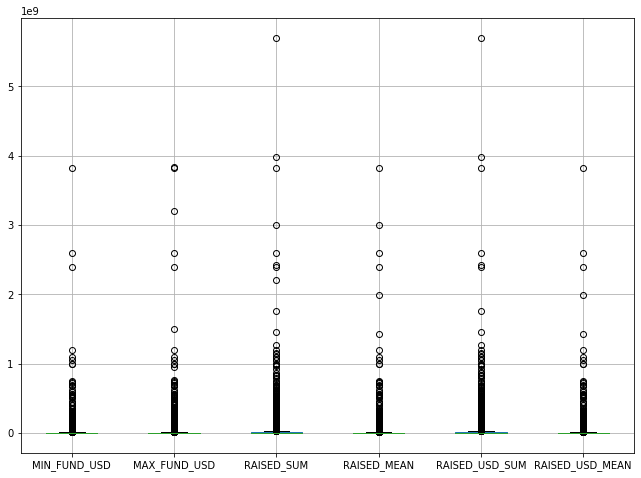

In [146]:
plt.figure(figsize=(11,8))
STARTUP_DF.drop('FUND_COUNT',axis=1).boxplot()

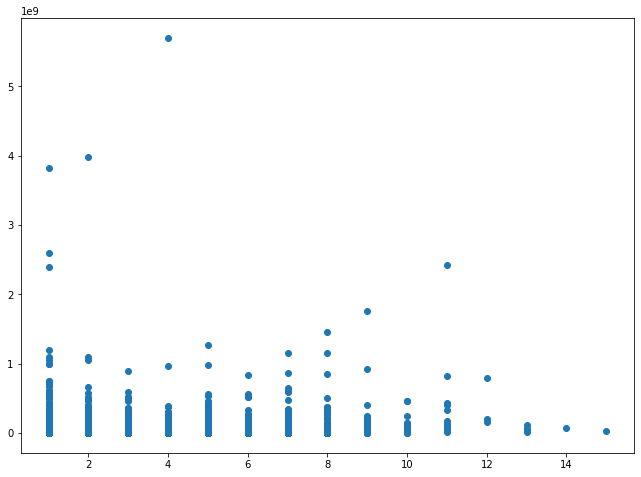

In [147]:
plt.figure(figsize=(11,8))
plt.scatter(y='RAISED_USD_SUM',x='FUND_COUNT',data = STARTUP_DF)

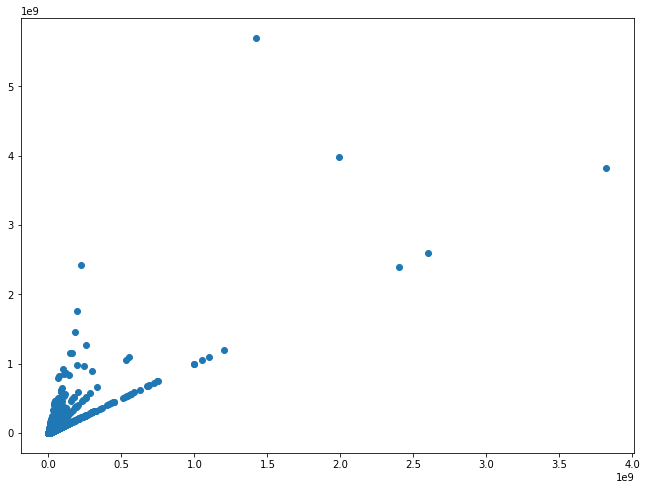

In [148]:
plt.figure(figsize=(11,8))
plt.scatter(y='RAISED_USD_SUM',x='RAISED_USD_MEAN',data = STARTUP_DF)

<div class="alert alert-block alert-success">

<div class="alert alert-block alert-warning">
    <h1>7. Dropping outlier with based on IQR

In [149]:
STARTUP_DF_NUMBER = STARTUP_DF.select_dtypes(np.number)

In [150]:
STARTUP_DF_NUMBER

,FUND_COUNT,MIN_FUND_USD,MAX_FUND_USD,RAISED_SUM,RAISED_MEAN,RAISED_USD_SUM,RAISED_USD_MEAN
0,1,5000000.0,5000000.0,5000000.0,5.000000e+06,5000000.0,5000000.0
1,2,45000000.0,120000000.0,165000000.0,8.250000e+07,165000000.0,82500000.0
2,3,5023000.0,17226000.0,23000000.0,7.666667e+06,28762500.0,9587500.0
3,2,600000.0,40000000.0,40600000.0,2.030000e+07,40600000.0,20300000.0
4,2,10000000.0,36000000.0,46000000.0,2.300000e+07,46000000.0,23000000.0
...,...,...,...,...,...,...,...
27938,1,4350000.0,4350000.0,4350000.0,4.350000e+06,4350000.0,4350000.0
27939,1,17000000.0,17000000.0,17000000.0,1.700000e+07,17000000.0,17000000.0
27940,1,151525.0,151525.0,100000.0,1.000000e+05,151525.0,151525.0
27941,1,1969827.0,1969827.0,1300000.0,1.300000e+06,1969827.0,1969827.0


In [151]:
# Q1 , Q3 , IQR calculation

DF_USED = STARTUP_DF_NUMBER

IQR_LIST = []
Q1Q3_LIST =[]

for i in DF_USED.columns:
    temp1 = DF_USED[i].describe()['25%']
    temp3 = DF_USED[i].describe()['75%']
    Q1Q3 = [temp1,temp3]
    Q1Q3_LIST.append(Q1Q3)
    tempIQR = temp3 - temp1
    IQR_LIST.append(tempIQR)

print(IQR_LIST)
print(Q1Q3_LIST)

[1.0, 4200000.0, 8299291.5, 10254693.5, 6150796.5, 10500000.0, 6233333.333333333]
[[1.0, 2.0], [300000.0, 4500000.0], [500000.0, 8799291.5], [500000.0, 10754693.5], [450000.0, 6600796.5], [500000.0, 11000000.0], [466666.6666666667, 6700000.0]]


In [152]:
# Search for outlier using Q1,Q3, & IQR

DF_USED = STARTUP_DF_NUMBER

OUTLIER_INDEX = []

for i in range(len(DF_USED.columns)):
    temp_index = DF_USED[(DF_USED[DF_USED.columns[i]] < Q1Q3_LIST[i][0]-(IQR_LIST[i]*1.5))| 
                       (DF_USED[DF_USED.columns[i]] > Q1Q3_LIST[i][1]+(IQR_LIST[i]*1.5))]
    OUTLIER_INDEX.append(temp_index)

# columns checked for outlier

print('jumlah kolom yang dicek : '+str(len(DF_USED.columns)))
print('jumlah kolom outlier : '+str(len(OUTLIER_INDEX)))

jumlah kolom yang dicek : 7
jumlah kolom outlier : 7


In [153]:
# Jumlah outlier with posibility of duplicate

JUMLAH_OUTLIER = 0

for i in range(len(OUTLIER_INDEX)):
    JUMLAH_OUTLIER += len(OUTLIER_INDEX[i])
    
print('jumlah data outlier : ' + str(JUMLAH_OUTLIER))

# no duplicate outlier list
# outlier_index number is the same with len outlier_index

df_OUTLIER = pd.concat([OUTLIER_INDEX[0],OUTLIER_INDEX[1],OUTLIER_INDEX[2],OUTLIER_INDEX[3],OUTLIER_INDEX[4],OUTLIER_INDEX[5],OUTLIER_INDEX[6]]).drop_duplicates().sort_index()

df_OUTLIER

print('jumlah data outlier no duplicate : ' + str(df_OUTLIER.shape[0]))

jumlah data outlier : 20403
jumlah data outlier no duplicate : 4252


In [154]:
STARTUP_DF_NOOUT = STARTUP_DF.drop(df_OUTLIER.index)

In [155]:
STARTUP_DF_NOOUT.describe().T

,count,mean,std,min,25%,50%,75%,max
FUND_COUNT,23691.0,1.350386e+00,6.103941e-01,1.0,1.0,1.0,2.000000e+00,5.000000e+00
MIN_FUND_USD,23691.0,3.846466e+06,1.358562e+07,291.0,250000.0,1000000.0,3.400000e+06,1.000000e+09
MAX_FUND_USD,23691.0,4.752604e+06,1.377005e+07,291.0,364302.0,1500000.0,5.000000e+06,1.000000e+09
RAISED_SUM,23691.0,5.423990e+06,1.420184e+07,1000.0,400000.0,1600000.0,6.000000e+06,1.000000e+09
RAISED_MEAN,23691.0,4.245400e+06,1.360873e+07,1000.0,311875.0,1300000.0,4.366667e+06,1.000000e+09
RAISED_USD_SUM,23691.0,5.478895e+06,1.421672e+07,291.0,400000.0,1678446.0,6.000000e+06,1.000000e+09
RAISED_USD_MEAN,23691.0,4.285856e+06,1.361593e+07,291.0,330000.0,1346510.0,4.500000e+06,1.000000e+09


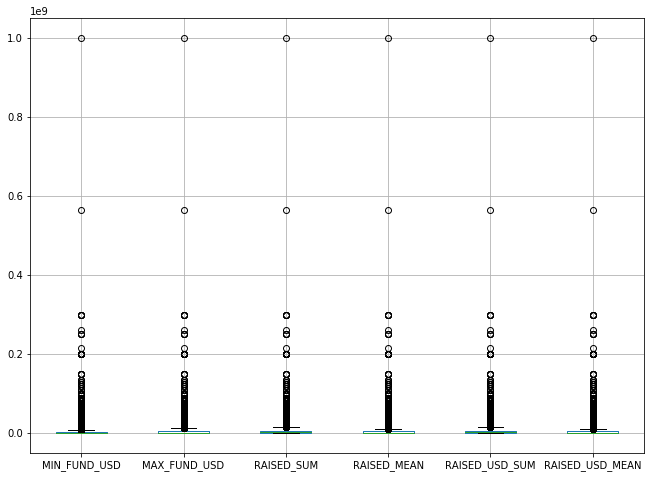

In [161]:
plt.figure(figsize=(11,8))
STARTUP_DF_NOOUT.drop('FUND_COUNT',axis=1).boxplot()

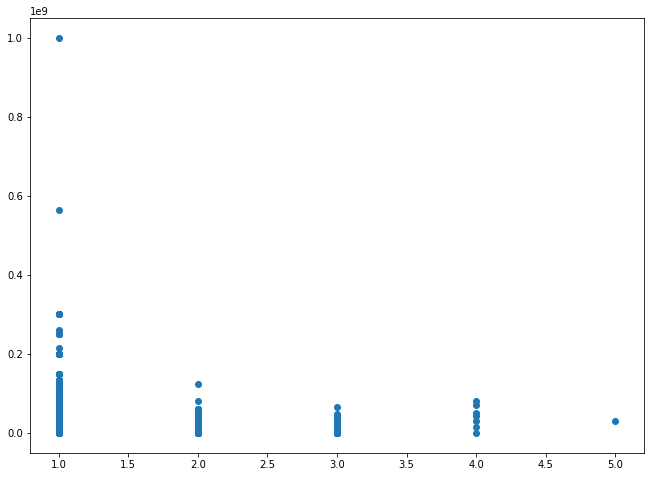

In [162]:
plt.figure(figsize=(11,8))
plt.scatter(y='RAISED_USD_SUM',x='FUND_COUNT',data = STARTUP_DF_NOOUT)

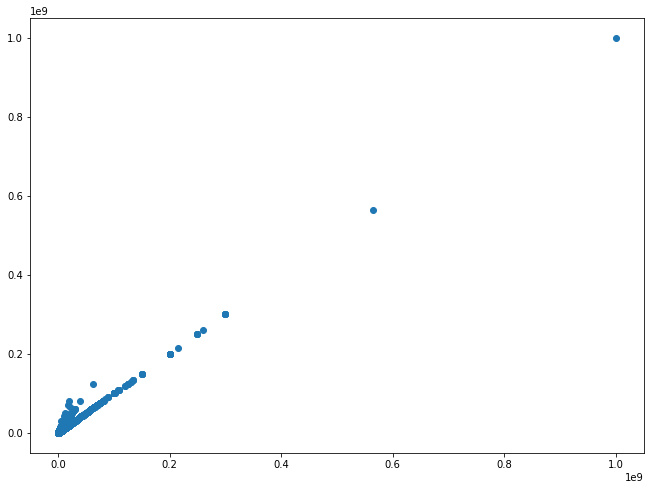

In [163]:
plt.figure(figsize=(11,8))
plt.scatter(y='RAISED_USD_SUM',x='RAISED_USD_MEAN',data = STARTUP_DF_NOOUT)

In [156]:
STARTUP_DF_NOOUT[STARTUP_DF_NOOUT['MAX_FUND_USD']==STARTUP_DF_NOOUT['MAX_FUND_USD'].max()]

,STARTUP_ID,FUND_DATE,MIN_DATE,MAX_DATE,FUND_TYPE,FUND_COUNT,CURRENCY,RAISED,RAISED_USD,MIN_FUND_USD,MAX_FUND_USD,RAISED_SUM,RAISED_MEAN,RAISED_USD_SUM,RAISED_USD_MEAN
27294,c:5229,[2013-11-04T00:00:00.000000000],2013-11-04,2013-11-04,[post-ipo],1,[USD],[1000000000.0],[1000000000.0],1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09


In [157]:
STARTUP_DF_NOOUT[STARTUP_DF_NOOUT['MAX_FUND_USD']>=400000000].index

Int64Index([27294, 27437], dtype='int64')

In [160]:
STARTUP_DF_NOOUT_FIXED = STARTUP_DF_NOOUT.drop(STARTUP_DF_NOOUT[STARTUP_DF_NOOUT['MAX_FUND_USD']>=400000000].index)

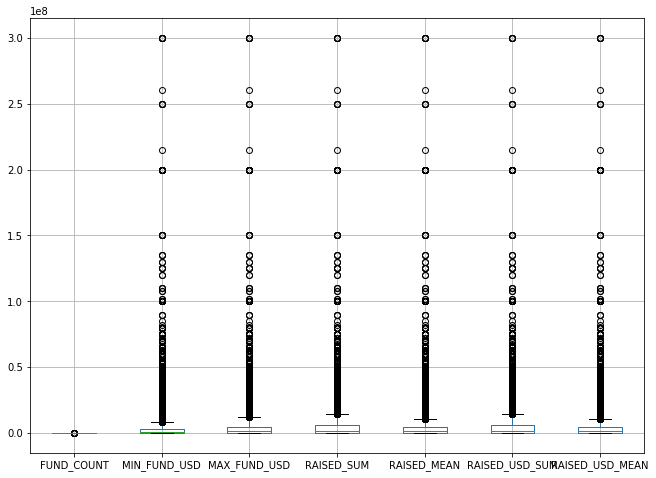

In [158]:
plt.figure(figsize=(11,8))
STARTUP_DF_NOOUT_FIXED.index).boxplot()

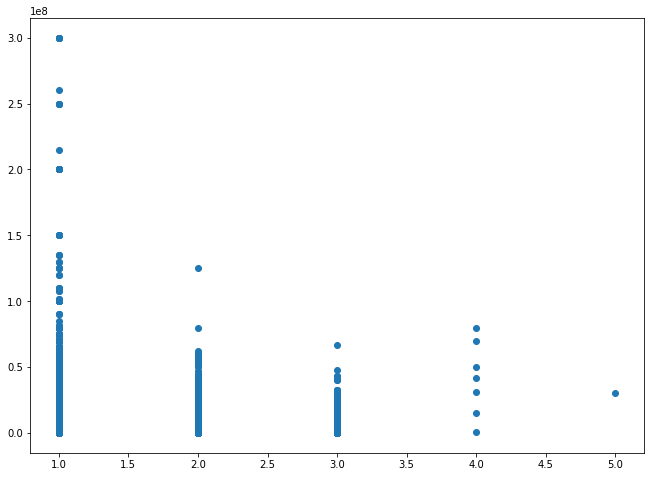

In [164]:
plt.figure(figsize=(11,8))
plt.scatter(y='RAISED_USD_SUM',x='FUND_COUNT',data = STARTUP_DF_NOOUT_FIXED)

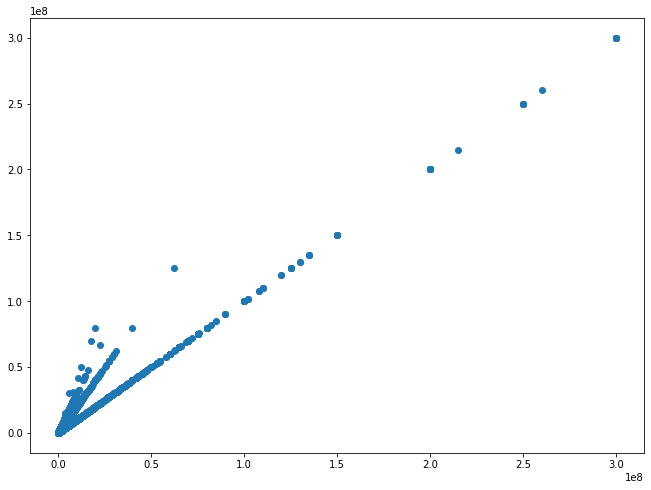

In [165]:
plt.figure(figsize=(11,8))
plt.scatter(y='RAISED_USD_SUM',x='RAISED_USD_MEAN',data = STARTUP_DF_NOOUT_FIXED)

In [186]:
STARTUP_DF_NOOUT_FIXED.to_csv('STARTUP_DF_CLEAN.csv')

In [187]:
STARTUP_DF_NOOUT_FIXED.to_pickle('STARTUP_DF_CLEAN.pkl')

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-warning">
<h1>8. DUMMIES FOR FUND TYPE

In [189]:
STARTUP_DF_CLEAN = pd.read_pickle('STARTUP_DF_CLEAN.pkl')

In [190]:
STARTUP_DF_CLEAN

,STARTUP_ID,FUND_DATE,MIN_DATE,MAX_DATE,FUND_TYPE,FUND_COUNT,CURRENCY,RAISED,RAISED_USD,MIN_FUND_USD,MAX_FUND_USD,RAISED_SUM,RAISED_MEAN,RAISED_USD_SUM,RAISED_USD_MEAN
0,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[5000000.0],[5000000.0],5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0
7,c:67397,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[2000000.0],[2000000.0],2000000.0,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0
10,c:19586,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[2000000.0],[2000000.0],2000000.0,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0
11,c:9009,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[angel],1,[EUR],[1350000.0],[1356210.0],1356210.0,1356210.0,1350000.0,1350000.0,1356210.0,1356210.0
12,c:48071,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[angel],1,[USD],[500000.0],[500000.0],500000.0,500000.0,500000.0,500000.0,500000.0,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27938,c:286125,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[USD],[4350000.0],[4350000.0],4350000.0,4350000.0,4350000.0,4350000.0,4350000.0,4350000.0
27939,c:286178,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-b],1,[USD],[17000000.0],[17000000.0],17000000.0,17000000.0,17000000.0,17000000.0,17000000.0,17000000.0
27940,c:286145,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[venture],1,[GBP],[100000.0],[151525.0],151525.0,151525.0,100000.0,100000.0,151525.0,151525.0
27941,c:286151,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[GBP],[1300000.0],[1969827.0],1969827.0,1969827.0,1300000.0,1300000.0,1969827.0,1969827.0


In [178]:
funding_used['funding_round_type'].unique()

array(['series-b', 'angel', 'series-a', 'series-c+', 'venture', 'other',
       'private-equity', 'post-ipo', 'crowdfunding'], dtype=object)

In [191]:
STARTUP_DF_CLEAN['FUND_TYPE'][0][0]

'series-a'

In [192]:
STARTUP_DF_CLEAN['FUND_TYPE'][0][0] in funding_used['funding_round_type'].unique()

True

In [194]:
STARTUP_DF_CLEAN['FUND_TYPE'][0][0] == 'series-a'

True

In [197]:
STARTUP_DF_CLEAN['FUND_TYPE'][335]

array(['angel', 'series-a', 'venture'], dtype=object)

In [198]:
len(STARTUP_DF_CLEAN['FUND_TYPE'][335])

3

In [204]:
SERIESB = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'series-b':
            yes+=1
        else:
            pass
    if yes > 0:
        SERIESB.append(1)
    else:
        SERIESB.append(0)

In [206]:
ANGEL = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'angel':
            yes+=1
        else:
            pass
    if yes > 0:
        ANGEL.append(1)
    else:
        ANGEL.append(0)

In [208]:
SERIESA = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'series-a':
            yes+=1
        else:
            pass
    if yes > 0:
        SERIESA.append(1)
    else:
        SERIESA.append(0)

In [209]:
SERIESCC = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'series-c+':
            yes+=1
        else:
            pass
    if yes > 0:
        SERIESCC.append(1)
    else:
        SERIESCC.append(0)

In [211]:
VENTURE = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'venture':
            yes+=1
        else:
            pass
    if yes > 0:
        VENTURE.append(1)
    else:
        VENTURE.append(0)

In [212]:
OTHER = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'other':
            yes+=1
        else:
            pass
    if yes > 0:
        OTHER.append(1)
    else:
        OTHER.append(0)

In [214]:
PRIVATE = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'private-equity':
            yes+=1
        else:
            pass
    if yes > 0:
        PRIVATE.append(1)
    else:
        PRIVATE.append(0)

In [215]:
POST = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'post-ipo':
            yes+=1
        else:
            pass
    if yes > 0:
        POST.append(1)
    else:
        POST.append(0)

In [216]:
CROWD = []

for i in STARTUP_DF_CLEAN.index:
    yes = 0
    for j in range(len(STARTUP_DF_CLEAN['FUND_TYPE'][i])):
        if STARTUP_DF_CLEAN['FUND_TYPE'][i][j] == 'crowdfunding':
            yes+=1
        else:
            pass
    if yes > 0:
        CROWD.append(1)
    else:
        CROWD.append(0)

In [225]:
STARTUP_DF_CLEAN_DUMMIES = STARTUP_DF_CLEAN

In [226]:
STARTUP_DF_CLEAN_DUMMIES['SERIES A'] = SERIESA
STARTUP_DF_CLEAN_DUMMIES['SERIES B'] = SERIESB
STARTUP_DF_CLEAN_DUMMIES['SERIES C+'] = SERIESCC
STARTUP_DF_CLEAN_DUMMIES['ANGEL'] = ANGEL
STARTUP_DF_CLEAN_DUMMIES['VENTURE'] = VENTURE
STARTUP_DF_CLEAN_DUMMIES['POST IPO'] = POST
STARTUP_DF_CLEAN_DUMMIES['OTHER'] = OTHER

In [227]:
STARTUP_DF_CLEAN_DUMMIES

,STARTUP_ID,FUND_DATE,MIN_DATE,MAX_DATE,FUND_TYPE,FUND_COUNT,CURRENCY,RAISED,RAISED_USD,MIN_FUND_USD,...,RAISED_MEAN,RAISED_USD_SUM,RAISED_USD_MEAN,SERIES A,SERIES B,SERIES C+,ANGEL,VENTURE,POST IPO,OTHER
0,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[5000000.0],[5000000.0],5000000.0,...,5000000.0,5000000.0,5000000.0,1,0,0,0,0,0,0
7,c:67397,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[2000000.0],[2000000.0],2000000.0,...,2000000.0,2000000.0,2000000.0,1,0,0,0,0,0,0
10,c:19586,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[2000000.0],[2000000.0],2000000.0,...,2000000.0,2000000.0,2000000.0,1,0,0,0,0,0,0
11,c:9009,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[angel],1,[EUR],[1350000.0],[1356210.0],1356210.0,...,1350000.0,1356210.0,1356210.0,0,0,0,1,0,0,0
12,c:48071,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[angel],1,[USD],[500000.0],[500000.0],500000.0,...,500000.0,500000.0,500000.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27938,c:286125,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[USD],[4350000.0],[4350000.0],4350000.0,...,4350000.0,4350000.0,4350000.0,1,0,0,0,0,0,0
27939,c:286178,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-b],1,[USD],[17000000.0],[17000000.0],17000000.0,...,17000000.0,17000000.0,17000000.0,0,1,0,0,0,0,0
27940,c:286145,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[venture],1,[GBP],[100000.0],[151525.0],151525.0,...,100000.0,151525.0,151525.0,0,0,0,0,1,0,0
27941,c:286151,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[GBP],[1300000.0],[1969827.0],1969827.0,...,1300000.0,1969827.0,1969827.0,1,0,0,0,0,0,0


In [234]:
STARTUP_DF_CLEAN_DUMMIES.columns

Index(['STARTUP_ID', 'FUND_DATE', 'MIN_DATE', 'MAX_DATE', 'FUND_TYPE',
       'FUND_COUNT', 'CURRENCY', 'RAISED', 'RAISED_USD', 'MIN_FUND_USD',
       'MAX_FUND_USD', 'RAISED_SUM', 'RAISED_MEAN', 'RAISED_USD_SUM',
       'RAISED_USD_MEAN', 'SERIES A', 'SERIES B', 'SERIES C+', 'ANGEL',
       'VENTURE', 'POST IPO', 'OTHER'],
      dtype='object')

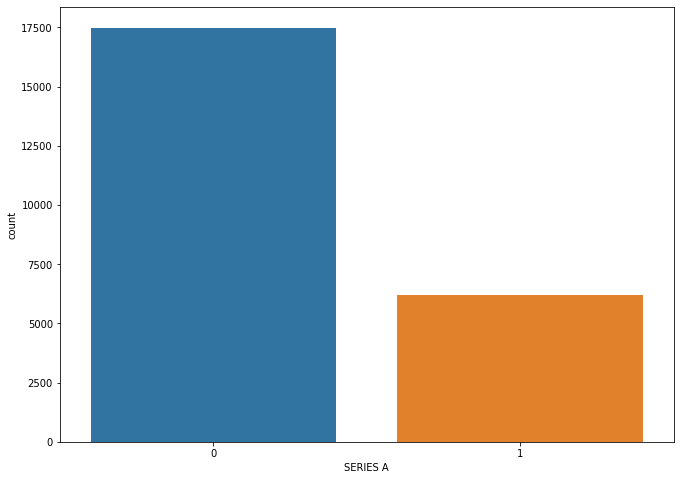

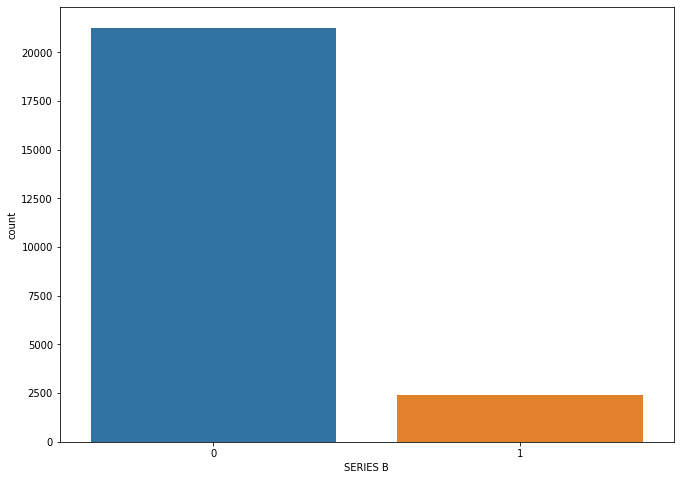

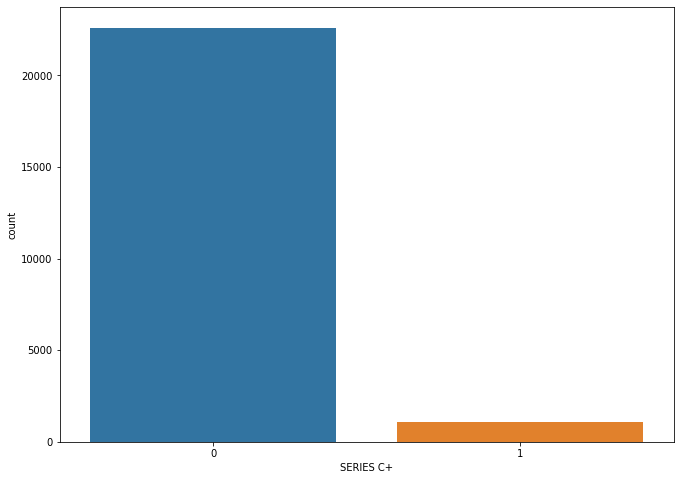

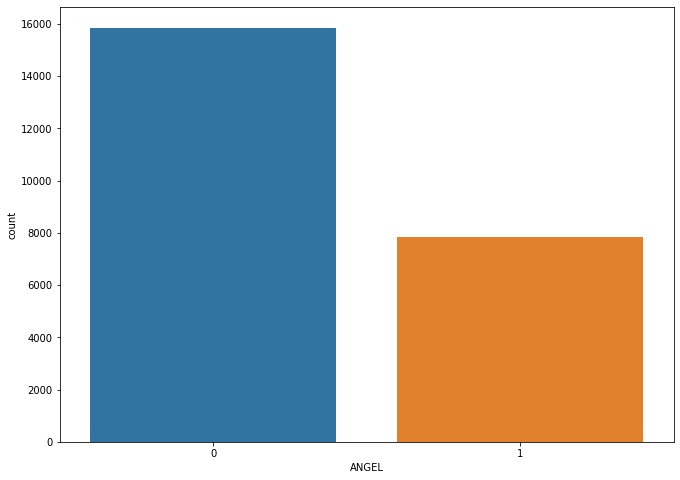

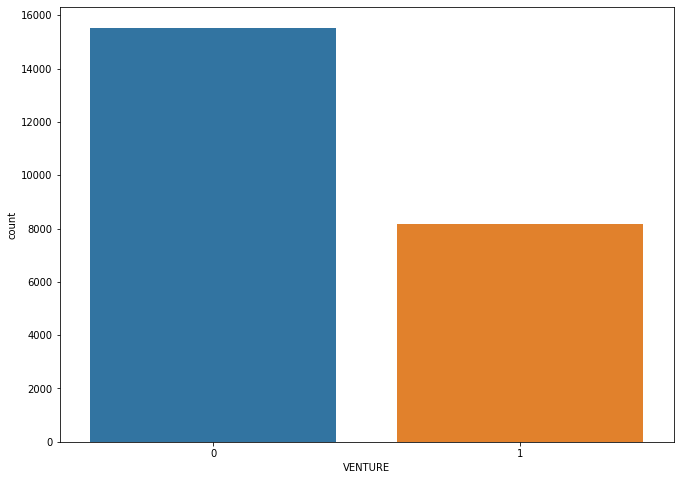

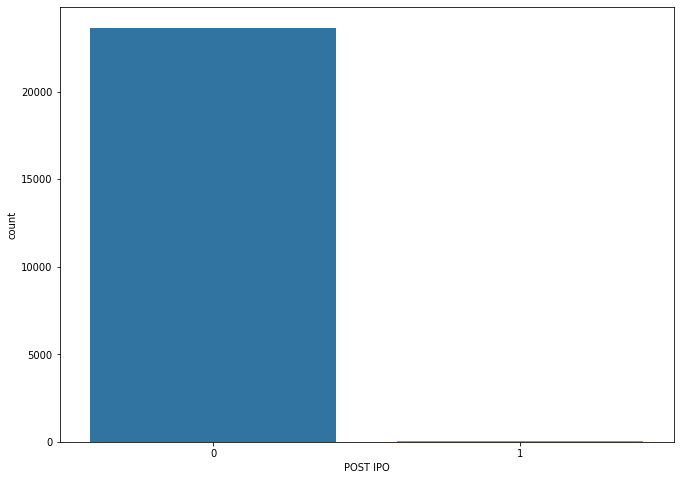

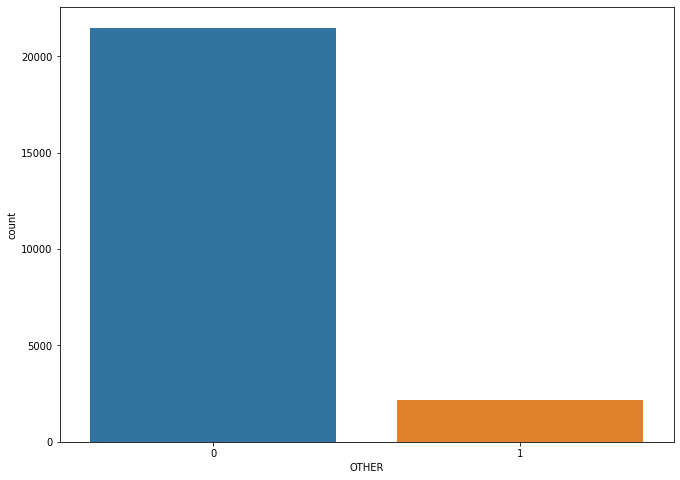

In [235]:
COUNTPLOT_LIST = ['SERIES A', 'SERIES B', 'SERIES C+', 'ANGEL',
       'VENTURE', 'POST IPO', 'OTHER']

for i in COUNTPLOT_LIST:
    plt.figure(figsize=(11,8))
    sns.countplot(STARTUP_DF_CLEAN_DUMMIES[i])
    plt.show()

In [236]:
STARTUP_DF_CLEAN_DUMMIES.to_csv('STARTUP_DF_CLEAN_DUMMIES.csv')

In [237]:
STARTUP_DF_CLEAN_DUMMIES.to_pickle('STARTUP_DF_CLEAN_DUMMIES.pkl')

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-warning">
<h1>9. Adding Latitude, Longitude, and Country Code of each startup

In [328]:
STARTUP_DF_CLEAN_DUMMIES = pd.read_pickle('STARTUP_DF_CLEAN_DUMMIES.pkl')

In [13]:
OFFICE = pd.read_csv('offices.csv')

In [242]:
OFFICE

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112713,112714,f:15098,127846,NaN,New York,8 Sound Shore Drive,Suite 303,Greenwich,06830,CT,USA,0.000000,0.000000,NaN,NaN
112714,112715,c:286200,127847,NaN,Santa Barbara,735 State Street,Suite 500,Santa Barbara,93101,CA,USA,0.000000,0.000000,NaN,NaN
112715,112716,c:256895,127848,NaN,Los Angeles,"5777 W. Century Blvd., Suite 360",NaN,Los Angeles,90045,CA,USA,0.000000,0.000000,NaN,NaN
112716,112717,c:256200,127849,NaN,New York,420 LExington Avenue,NaN,New York,10170,NY,USA,0.000000,0.000000,NaN,NaN


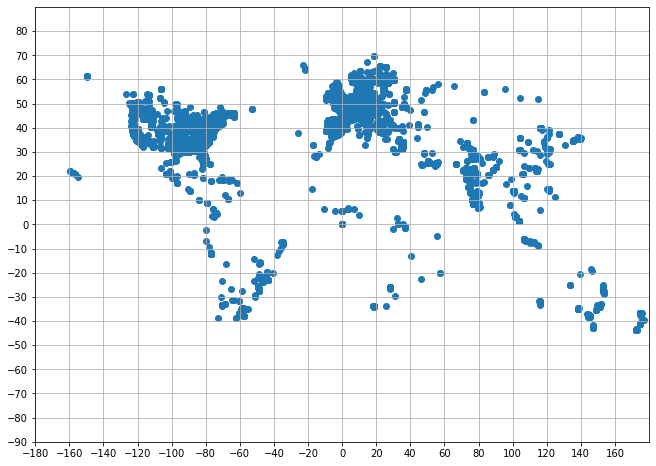

In [14]:
plt.figure(figsize=(11,8))
plt.scatter(y='latitude',x='longitude',data=OFFICE)
plt.ylim(-90,90)
plt.yticks(np.arange(-90,90,10))
plt.xlim(-180,180)
plt.xticks(np.arange(-180,180,20))
plt.grid()

In [333]:
OFFICE['country_code'].value_counts().head(10)

USA    62991
GBR     9719
IND     5099
CAN     4574
DEU     2768
FRA     2285
AUS     2022
ESP     1482
ISR     1429
CHN     1375
Name: country_code, dtype: int64

In [248]:
STARTUP_DF_CLEAN_DUMMIES['STARTUP_ID'].values

array(['c:172767', 'c:67397', 'c:19586', ..., 'c:286145', 'c:286151',
       'c:245076'], dtype=object)

In [298]:
STARTUP_DF_CLEAN_DUMMIES_JOIN = STARTUP_DF_CLEAN_DUMMIES

In [300]:
OFFICE_JOIN = OFFICE[['object_id','latitude','longitude','country_code']]

In [301]:
OFFICE_JOIN_READY = OFFICE_JOIN.rename(columns={'object_id':'STARTUP_ID'})

In [258]:
STARTUP_DF_CLEAN_DUMMIES_JOIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23689 entries, 0 to 27942
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STARTUP_ID       23689 non-null  object        
 1   FUND_DATE        23689 non-null  object        
 2   MIN_DATE         23689 non-null  datetime64[ns]
 3   MAX_DATE         23689 non-null  datetime64[ns]
 4   FUND_TYPE        23689 non-null  object        
 5   FUND_COUNT       23689 non-null  int64         
 6   CURRENCY         23689 non-null  object        
 7   RAISED           23689 non-null  object        
 8   RAISED_USD       23689 non-null  object        
 9   MIN_FUND_USD     23689 non-null  float64       
 10  MAX_FUND_USD     23689 non-null  float64       
 11  RAISED_SUM       23689 non-null  float64       
 12  RAISED_MEAN      23689 non-null  float64       
 13  RAISED_USD_SUM   23689 non-null  float64       
 14  RAISED_USD_MEAN  23689 non-null  float

In [259]:
OFFICE_JOIN_READY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112718 entries, 0 to 112717
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   STARTUP_ID    112718 non-null  object 
 1   latitude      112718 non-null  float64
 2   longitude     112718 non-null  float64
 3   country_code  112718 non-null  object 
dtypes: float64(2), object(2)
memory usage: 3.4+ MB


In [303]:
STARTUP_DF_CLEAN_DUMMIES_MERGE = STARTUP_DF_CLEAN_DUMMIES_JOIN.merge(OFFICE_JOIN_READY,on='STARTUP_ID')

In [269]:
STARTUP_DF_CLEAN_DUMMIES_MERGE

,STARTUP_ID,FUND_DATE,MIN_DATE,MAX_DATE,FUND_TYPE,FUND_COUNT,CURRENCY,RAISED,RAISED_USD,MIN_FUND_USD,...,SERIES A,SERIES B,SERIES C+,ANGEL,VENTURE,POST IPO,OTHER,latitude,longitude,country_code
0,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[5000000.0],[5000000.0],5000000.0,...,1,0,0,0,0,0,0,38.985049,-77.088661,USA
1,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[5000000.0],[5000000.0],5000000.0,...,1,0,0,0,0,0,0,37.789752,-122.399396,USA
2,c:67397,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[2000000.0],[2000000.0],2000000.0,...,1,0,0,0,0,0,0,0.000000,0.000000,USA
3,c:19586,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[2000000.0],[2000000.0],2000000.0,...,1,0,0,0,0,0,0,43.447727,-1.555580,FRA
4,c:9009,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[angel],1,[EUR],[1350000.0],[1356210.0],1356210.0,...,0,0,0,1,0,0,0,41.907696,12.496985,ITA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25077,c:286125,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[USD],[4350000.0],[4350000.0],4350000.0,...,1,0,0,0,0,0,0,0.000000,0.000000,USA
25078,c:286178,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-b],1,[USD],[17000000.0],[17000000.0],17000000.0,...,0,1,0,0,0,0,0,0.000000,0.000000,USA
25079,c:286145,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[venture],1,[GBP],[100000.0],[151525.0],151525.0,...,0,0,0,0,1,0,0,0.000000,0.000000,GBR
25080,c:286151,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[GBP],[1300000.0],[1969827.0],1969827.0,...,1,0,0,0,0,0,0,0.000000,0.000000,GBR


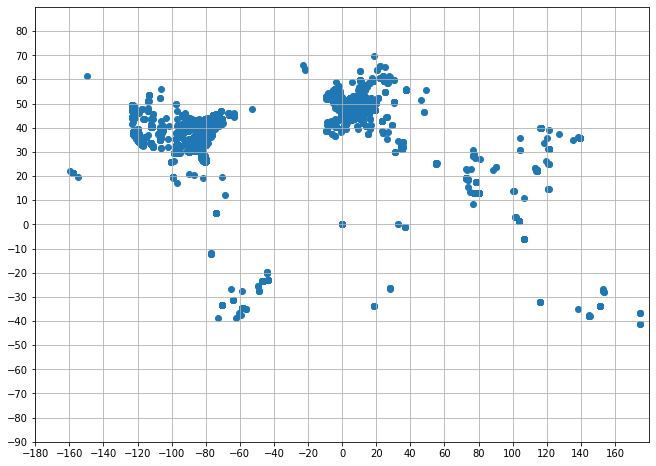

In [331]:
plt.figure(figsize=(11,8))
plt.scatter(y='latitude',x='longitude',data=STARTUP_DF_CLEAN_DUMMIES_MERGE)
plt.ylim(-90,90)
plt.yticks(np.arange(-90,90,10))
plt.xlim(-180,180)
plt.xticks(np.arange(-180,180,20))
plt.grid()

In [334]:
STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'].value_counts().head(10)

USA    16187
GBR     1713
CAN      827
FRA      638
ISR      495
DEU      480
IND      462
ESP      383
CHN      294
AUS      271
Name: country_code, dtype: int64

In [306]:
STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'].nunique()

123

In [285]:
STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'].value_counts().head(10)

USA    16187
GBR     1713
CAN      827
FRA      638
ISR      495
DEU      480
IND      462
ESP      383
CHN      294
AUS      271
Name: country_code, dtype: int64

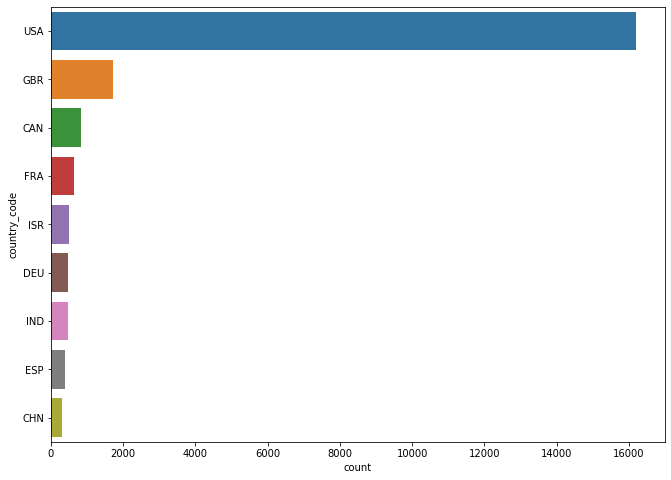

In [288]:
plt.figure(figsize=(11,8))
sns.countplot(y = STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'],
             order = STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'].value_counts().iloc[:9].index)

<div class="alert alert-block alert-success">

<div class="alert alert-block alert-warning">
    <h1> 10. Labeling for country_code column

In [310]:
COUNTRY_NO =  np.arange(len(STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'].unique()))

In [314]:
COUNTRY_CODE_NO = []

for i in range(len(STARTUP_DF_CLEAN_DUMMIES_MERGE)):
    for j in range(len(STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'].unique())):
        if STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'][i] == STARTUP_DF_CLEAN_DUMMIES_MERGE['country_code'].unique()[j]:
            COUNTRY_CODE_NO.append(j)
        else:
            pass

In [317]:
STARTUP_DF_CLEAN_DUMMIES_MERGE['COUNTRY_CODE_NO'] = COUNTRY_CODE_NO

In [319]:
STARTUP_DF_CLEAN_DUMMIES_MERGE

,STARTUP_ID,FUND_DATE,MIN_DATE,MAX_DATE,FUND_TYPE,FUND_COUNT,CURRENCY,RAISED,RAISED_USD,MIN_FUND_USD,...,SERIES B,SERIES C+,ANGEL,VENTURE,POST IPO,OTHER,latitude,longitude,country_code,COUNTRY_CODE_NO
0,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[5000000.0],[5000000.0],5000000.0,...,0,0,0,0,0,0,38.985049,-77.088661,USA,0
1,c:172767,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[5000000.0],[5000000.0],5000000.0,...,0,0,0,0,0,0,37.789752,-122.399396,USA,0
2,c:67397,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[2000000.0],[2000000.0],2000000.0,...,0,0,0,0,0,0,0.000000,0.000000,USA,0
3,c:19586,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[series-a],1,[USD],[2000000.0],[2000000.0],2000000.0,...,0,0,0,0,0,0,43.447727,-1.555580,FRA,1
4,c:9009,[2000-01-01T00:00:00.000000000],2000-01-01,2000-01-01,[angel],1,[EUR],[1350000.0],[1356210.0],1356210.0,...,0,0,1,0,0,0,41.907696,12.496985,ITA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25077,c:286125,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[USD],[4350000.0],[4350000.0],4350000.0,...,0,0,0,0,0,0,0.000000,0.000000,USA,0
25078,c:286178,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-b],1,[USD],[17000000.0],[17000000.0],17000000.0,...,1,0,0,0,0,0,0.000000,0.000000,USA,0
25079,c:286145,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[venture],1,[GBP],[100000.0],[151525.0],151525.0,...,0,0,0,1,0,0,0.000000,0.000000,GBR,6
25080,c:286151,[2013-12-12T00:00:00.000000000],2013-12-12,2013-12-12,[series-a],1,[GBP],[1300000.0],[1969827.0],1969827.0,...,0,0,0,0,0,0,0.000000,0.000000,GBR,6


In [323]:
STARTUP_DF_CLEAN_DUMMIES_MERGE[['FUND_COUNT','RAISED_USD_SUM','RAISED_USD_MEAN','MIN_FUND_USD','MAX_FUND_USD']].describe().T[['min','mean','max']]

,min,mean,max
FUND_COUNT,1.0,1.384698e+00,5.0
RAISED_USD_SUM,291.0,5.878506e+06,300000000.0
RAISED_USD_MEAN,291.0,4.498154e+06,300000000.0
MIN_FUND_USD,291.0,3.998593e+06,300000000.0
MAX_FUND_USD,291.0,5.029963e+06,300000000.0


In [4]:
STARTUP_DF_CLEAN_DUMMIES_MERGE.columns

Index(['STARTUP_ID', 'FUND_DATE', 'MIN_DATE', 'MAX_DATE', 'FUND_TYPE',
       'FUND_COUNT', 'CURRENCY', 'RAISED', 'RAISED_USD', 'MIN_FUND_USD',
       'MAX_FUND_USD', 'RAISED_SUM', 'RAISED_MEAN', 'RAISED_USD_SUM',
       'RAISED_USD_MEAN', 'SERIES A', 'SERIES B', 'SERIES C+', 'ANGEL',
       'VENTURE', 'POST IPO', 'OTHER', 'latitude', 'longitude', 'country_code',
       'COUNTRY_CODE_NO'],
      dtype='object')

In [6]:
STARTUP_DF_CLEAN_DUMMIES_MERGE = STARTUP_DF_CLEAN_DUMMIES_MERGE.drop(['CURRENCY','RAISED','RAISED_SUM','RAISED_MEAN'],axis=1)

In [8]:
STARTUP_DF_CLEAN_DUMMIES_MERGE = STARTUP_DF_CLEAN_DUMMIES_MERGE.rename(columns={'latitude':'LATITUDE','longitude':'LONGITUDE','country_code':'COUNTRY_CODE'})

In [2]:
STARTUP_DF_CLEAN_DUMMIES_MERGE = pd.read_pickle('STARTUP_DF_FINAL.pkl')

In [3]:
STARTUP_DF_CLEAN_DUMMIES_MERGE = STARTUP_DF_CLEAN_DUMMIES_MERGE.reset_index()

In [4]:
STARTUP_DF_CLEAN_DUMMIES_MERGE.to_csv('STARTUP_DF_FINAL.csv')

In [5]:
STARTUP_DF_CLEAN_DUMMIES_MERGE.to_pickle('STARTUP_DF_FINAL.pkl')

<div class="alert alert-block alert-warning">
    <h1> Next Step: Exploratory Data Analysis